## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
%matplotlib inline

In [2]:
PATH = "data\\bulldozers\\"
train = pd.read_csv(f'{PATH}train_jDb5RBj.csv', low_memory=False)
ids, y = train['ID'], train['Purchase']

In [3]:
test = pd.read_csv(PATH + 'test_dan2xFI.csv')

In [4]:
train_ = train.drop(['ID','Purchase'],axis = 1)
test_ = test.copy()
test_ = test_.drop('ID',axis = 1)
for i in train_.columns:
    train_[i] = train_[i].apply(str)
    test_[i] = test_[i].apply(str)

In [5]:
categorical_features_indices = np.where(train_.dtypes != np.float)[0]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(train_, train['Purchase'], train_size=0.8, random_state=1234)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
#importing library and building model
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=100, depth=10, learning_rate=0.01, loss_function='Logloss',class_weights=[1,3])
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation))

0:	learn: 0.6846107	test: 0.6851212	best: 0.6851212 (0)	total: 1.34s	remaining: 2m 12s
1:	learn: 0.6774166	test: 0.6781991	best: 0.6781991 (1)	total: 1.46s	remaining: 1m 11s
2:	learn: 0.6703312	test: 0.6709523	best: 0.6709523 (2)	total: 1.52s	remaining: 49.1s
3:	learn: 0.6633268	test: 0.6641514	best: 0.6641514 (3)	total: 2.8s	remaining: 1m 7s
4:	learn: 0.6568817	test: 0.6575711	best: 0.6575711 (4)	total: 2.99s	remaining: 56.7s
5:	learn: 0.6498401	test: 0.6508585	best: 0.6508585 (5)	total: 3.32s	remaining: 52s
6:	learn: 0.6428361	test: 0.6441284	best: 0.6441284 (6)	total: 4.56s	remaining: 1m
7:	learn: 0.6342452	test: 0.6366085	best: 0.6366085 (7)	total: 5.94s	remaining: 1m 8s
8:	learn: 0.6290908	test: 0.6316594	best: 0.6316594 (8)	total: 5.99s	remaining: 1m
9:	learn: 0.6237369	test: 0.6260270	best: 0.6260270 (9)	total: 6s	remaining: 54s
10:	learn: 0.6176003	test: 0.6203778	best: 0.6203778 (10)	total: 6.11s	remaining: 49.5s
11:	learn: 0.6117612	test: 0.6147960	best: 0.6147960 (11)	total:

94:	learn: 0.3301840	test: 0.4141345	best: 0.4141345 (94)	total: 1m 42s	remaining: 5.39s
95:	learn: 0.3285664	test: 0.4131713	best: 0.4131713 (95)	total: 1m 43s	remaining: 4.33s
96:	learn: 0.3267167	test: 0.4124298	best: 0.4124298 (96)	total: 1m 45s	remaining: 3.26s
97:	learn: 0.3251636	test: 0.4120925	best: 0.4120925 (97)	total: 1m 46s	remaining: 2.18s
98:	learn: 0.3234726	test: 0.4112408	best: 0.4112408 (98)	total: 1m 48s	remaining: 1.09s
99:	learn: 0.3211949	test: 0.4103270	best: 0.4103270 (99)	total: 1m 49s	remaining: 0us

bestTest = 0.4103269702
bestIteration = 99



In [77]:
model=CatBoostClassifier(iterations=300, depth=10, learning_rate=0.02, loss_function='Logloss')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation))

0:	learn: 0.6699248	test: 0.6698186	best: 0.6698186 (0)	total: 49.7ms	remaining: 14.9s
1:	learn: 0.6476912	test: 0.6478399	best: 0.6478399 (1)	total: 208ms	remaining: 31s
2:	learn: 0.6267564	test: 0.6267739	best: 0.6267739 (2)	total: 223ms	remaining: 22.1s
3:	learn: 0.6069451	test: 0.6068209	best: 0.6068209 (3)	total: 337ms	remaining: 25s
4:	learn: 0.5880965	test: 0.5878693	best: 0.5878693 (4)	total: 343ms	remaining: 20.3s
5:	learn: 0.5701798	test: 0.5701452	best: 0.5701452 (5)	total: 373ms	remaining: 18.3s
6:	learn: 0.5532184	test: 0.5531126	best: 0.5531126 (6)	total: 387ms	remaining: 16.2s
7:	learn: 0.5369603	test: 0.5369145	best: 0.5369145 (7)	total: 416ms	remaining: 15.2s
8:	learn: 0.5217177	test: 0.5215659	best: 0.5215659 (8)	total: 422ms	remaining: 13.6s
9:	learn: 0.5072663	test: 0.5070108	best: 0.5070108 (9)	total: 429ms	remaining: 12.4s
10:	learn: 0.4935067	test: 0.4930766	best: 0.4930766 (10)	total: 443ms	remaining: 11.6s
11:	learn: 0.4805356	test: 0.4800046	best: 0.4800046 (1

95:	learn: 0.2129441	test: 0.2197810	best: 0.2197810 (95)	total: 16s	remaining: 34.1s
96:	learn: 0.2124909	test: 0.2192588	best: 0.2192588 (96)	total: 16s	remaining: 33.6s
97:	learn: 0.2115224	test: 0.2189902	best: 0.2189902 (97)	total: 16.4s	remaining: 33.8s
98:	learn: 0.2101401	test: 0.2184358	best: 0.2184358 (98)	total: 17.6s	remaining: 35.7s
99:	learn: 0.2089639	test: 0.2180690	best: 0.2180690 (99)	total: 18.9s	remaining: 37.7s
100:	learn: 0.2080176	test: 0.2180141	best: 0.2180141 (100)	total: 19.4s	remaining: 38.3s
101:	learn: 0.2074456	test: 0.2174465	best: 0.2174465 (101)	total: 19.5s	remaining: 37.8s
102:	learn: 0.2070024	test: 0.2169332	best: 0.2169332 (102)	total: 19.5s	remaining: 37.3s
103:	learn: 0.2057159	test: 0.2167689	best: 0.2167689 (103)	total: 20.7s	remaining: 39s
104:	learn: 0.2046113	test: 0.2166293	best: 0.2166293 (104)	total: 22s	remaining: 40.8s
105:	learn: 0.2032887	test: 0.2165436	best: 0.2165436 (105)	total: 23.2s	remaining: 42.4s
106:	learn: 0.2024536	test: 

187:	learn: 0.1622979	test: 0.2107067	best: 0.2105629 (184)	total: 1m 21s	remaining: 48.4s
188:	learn: 0.1619498	test: 0.2108159	best: 0.2105629 (184)	total: 1m 22s	remaining: 48.4s
189:	learn: 0.1612040	test: 0.2108903	best: 0.2105629 (184)	total: 1m 23s	remaining: 48.5s
190:	learn: 0.1606559	test: 0.2108716	best: 0.2105629 (184)	total: 1m 24s	remaining: 48.5s
191:	learn: 0.1603144	test: 0.2111124	best: 0.2105629 (184)	total: 1m 25s	remaining: 47.9s
192:	learn: 0.1599591	test: 0.2112714	best: 0.2105629 (184)	total: 1m 25s	remaining: 47.4s
193:	learn: 0.1591892	test: 0.2109697	best: 0.2105629 (184)	total: 1m 26s	remaining: 47.3s
194:	learn: 0.1591304	test: 0.2109918	best: 0.2105629 (184)	total: 1m 26s	remaining: 46.7s
195:	learn: 0.1582843	test: 0.2111627	best: 0.2105629 (184)	total: 1m 28s	remaining: 46.8s
196:	learn: 0.1575778	test: 0.2112481	best: 0.2105629 (184)	total: 1m 29s	remaining: 46.8s
197:	learn: 0.1575356	test: 0.2111671	best: 0.2105629 (184)	total: 1m 29s	remaining: 46.1s

278:	learn: 0.1290380	test: 0.2121328	best: 0.2105629 (184)	total: 2m 36s	remaining: 11.8s
279:	learn: 0.1284968	test: 0.2121849	best: 0.2105629 (184)	total: 2m 37s	remaining: 11.3s
280:	learn: 0.1284793	test: 0.2121486	best: 0.2105629 (184)	total: 2m 37s	remaining: 10.7s
281:	learn: 0.1281923	test: 0.2120986	best: 0.2105629 (184)	total: 2m 38s	remaining: 10.1s
282:	learn: 0.1281894	test: 0.2120914	best: 0.2105629 (184)	total: 2m 38s	remaining: 9.55s
283:	learn: 0.1274435	test: 0.2123112	best: 0.2105629 (184)	total: 2m 40s	remaining: 9.03s
284:	learn: 0.1270979	test: 0.2123783	best: 0.2105629 (184)	total: 2m 41s	remaining: 8.51s
285:	learn: 0.1266098	test: 0.2125951	best: 0.2105629 (184)	total: 2m 43s	remaining: 7.98s
286:	learn: 0.1259064	test: 0.2124510	best: 0.2105629 (184)	total: 2m 44s	remaining: 7.44s
287:	learn: 0.1258898	test: 0.2124156	best: 0.2105629 (184)	total: 2m 44s	remaining: 6.84s
288:	learn: 0.1257976	test: 0.2124057	best: 0.2105629 (184)	total: 2m 44s	remaining: 6.25s

In [78]:
prediction_proba = model.predict_proba(test_)

In [79]:
def make_submission(probs):
    sample = pd.read_csv(PATH + 'sample.csv')
    submit = sample.copy()
    submit['Purchase'] = probs
    return submit

In [80]:
submit = make_submission(prediction_proba[:,1])

In [81]:
submit.to_csv(PATH + 'cat_300_.02.csv')

## Grid Cv

In [26]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [60]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y , dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y , dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        plt.figure(figsize=(20,20))
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9507
AUC Score (Train): 0.919207
CV Score : Mean - 0.746342 | Std - 0.03290251 | Min - 0.6999938 | Max - 0.7866071


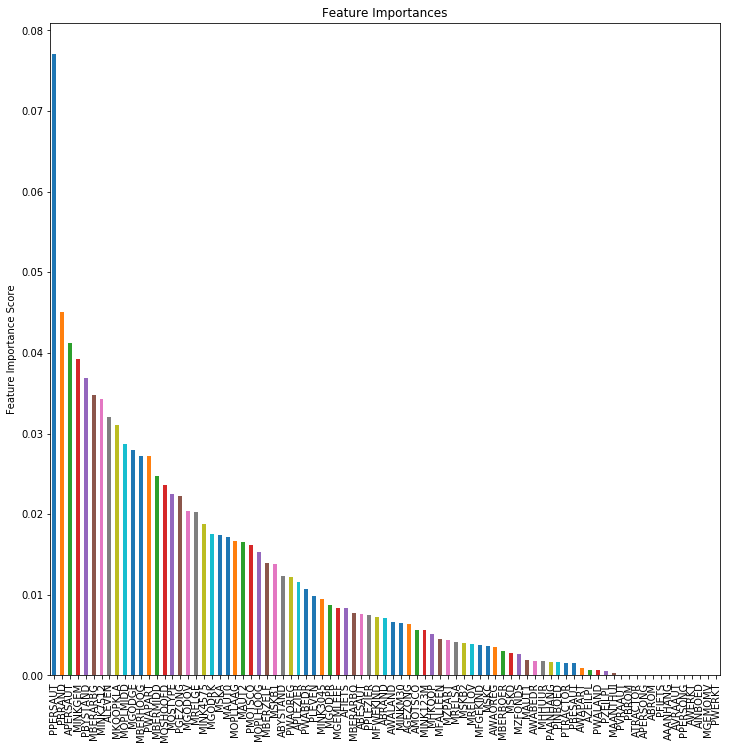

In [40]:
#Choose all predictors except target & IDcols
predictors = train_.columns
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)

In [45]:
param_test1 = {'n_estimators':[20, 30, 40, 50, 60, 70, 80, 90]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, min_samples_split=500,
                        min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors], y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [46]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.75786, std: 0.04541, params: {'n_estimators': 20},
  mean: 0.75956, std: 0.04903, params: {'n_estimators': 30},
  mean: 0.75750, std: 0.05016, params: {'n_estimators': 40},
  mean: 0.75898, std: 0.04599, params: {'n_estimators': 50},
  mean: 0.75835, std: 0.04518, params: {'n_estimators': 60},
  mean: 0.76000, std: 0.04347, params: {'n_estimators': 70},
  mean: 0.75769, std: 0.04377, params: {'n_estimators': 80},
  mean: 0.75599, std: 0.04094, params: {'n_estimators': 90}],
 {'n_estimators': 70},
 0.760000019680155)

In [55]:
## Test 2
param_test2 = {'max_depth':[5, 7, 9, 11, 13, 15] ,'min_samples_split': [200, 400, 600, 800, 1000]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=70, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [56]:
gsearch2.fit(train[predictors], y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.75963, std: 0.03429, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.75616, std: 0.03440, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.76514, std: 0.03326, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.77028, std: 0.02879, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.76813, std: 0.02803, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.75295, std: 0.03801, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.75495, std: 0.03283, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.75903, std: 0.03121, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.76978, std: 0.02988, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.76512, std: 0.03029, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.74006, std: 0.03903, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.75114, std: 0.03818, params: {'max_depth': 9, 'min_samples_split': 400},
  

In [57]:
#test 3
param_test3 = {'min_samples_split': [800, 1000, 1200, 1400, 1600] , 'min_samples_leaf': [30, 40, 50, 60, 70]}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=70,max_depth=5,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [58]:
gsearch3.fit(train[predictors], y)
gsearch3.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.75961, std: 0.04145, params: {'min_samples_leaf': 30, 'min_samples_split': 800},
  mean: 0.75970, std: 0.04062, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.76251, std: 0.04009, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.76317, std: 0.03833, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.76284, std: 0.04049, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.76191, std: 0.04055, params: {'min_samples_leaf': 40, 'min_samples_split': 800},
  mean: 0.75857, std: 0.03985, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.76197, std: 0.03988, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.76334, std: 0.04063, params: {'min_samples_leaf': 40, 'min_samples_split': 1400},
  mean: 0.76216, std: 0.04121, params: {'min_samples_leaf': 40, 'min_samples_split': 1600},
  mean: 0.75848, std: 0.04235, params: {'min_samples_leaf': 50, 'min_samples_split


Model Report
Accuracy : 0.9374
AUC Score (Train): 0.797835
CV Score : Mean - 0.7633389 | Std - 0.04062501 | Min - 0.7205147 | Max - 0.8170092


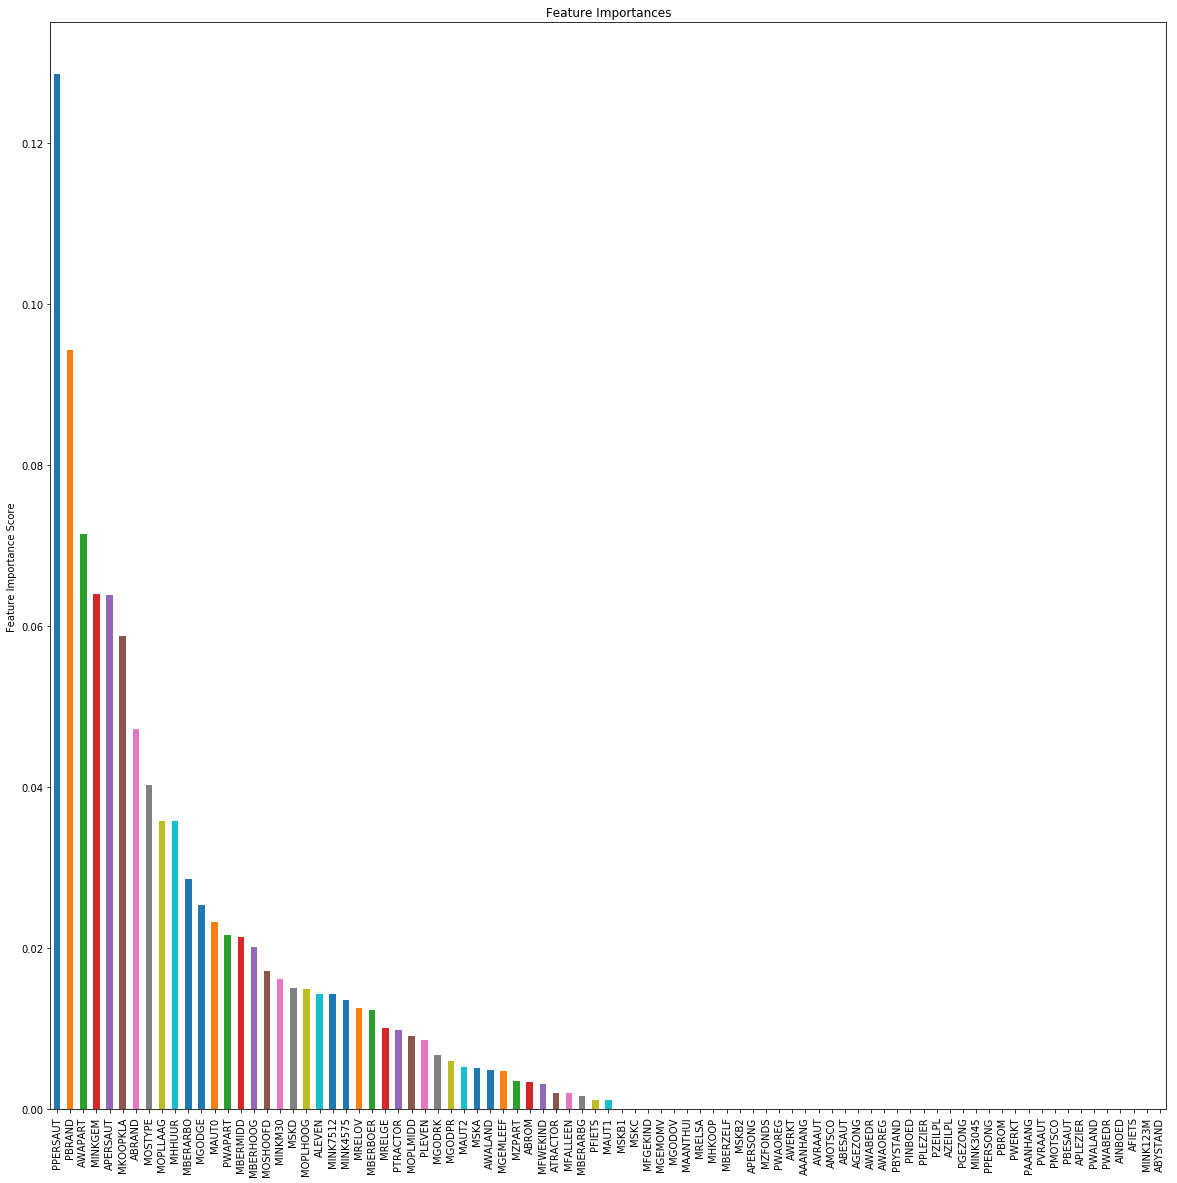

In [61]:
modelfit(gsearch3.best_estimator_, train, predictors)

In [69]:
#test 4
param_test4 = {'max_features': [7, 9, 11, 13, 15, 17, 19, 21]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, min_samples_split = 800, n_estimators=70,max_depth=5,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [70]:
gsearch4.fit(train[predictors], y )
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.76454, std: 0.02451, params: {'max_features': 7},
  mean: 0.77028, std: 0.02879, params: {'max_features': 9},
  mean: 0.76460, std: 0.02670, params: {'max_features': 11},
  mean: 0.76892, std: 0.03054, params: {'max_features': 13},
  mean: 0.76609, std: 0.02405, params: {'max_features': 15},
  mean: 0.76901, std: 0.02707, params: {'max_features': 17},
  mean: 0.76856, std: 0.02800, params: {'max_features': 19},
  mean: 0.76722, std: 0.02624, params: {'max_features': 21}],
 {'max_features': 9},
 0.7702836854978986)

In [71]:
#test 5
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, min_samples_split = 800, 
                                                               n_estimators=70,max_depth=5,max_features= 9 , 
                                                               subsample=0.8, random_state=10), 
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [73]:
gsearch5.fit(train[predictors], y )
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.76525, std: 0.02880, params: {'subsample': 0.6},
  mean: 0.76375, std: 0.02847, params: {'subsample': 0.7},
  mean: 0.76945, std: 0.03092, params: {'subsample': 0.75},
  mean: 0.77028, std: 0.02879, params: {'subsample': 0.8},
  mean: 0.77283, std: 0.03167, params: {'subsample': 0.85},
  mean: 0.77211, std: 0.03195, params: {'subsample': 0.9}],
 {'subsample': 0.85},
 0.7728346744178137)

## Fun


Model Report
Accuracy : 0.9374
AUC Score (Train): 0.835988
CV Score : Mean - 0.7618293 | Std - 0.04131622 | Min - 0.7182929 | Max - 0.8192927


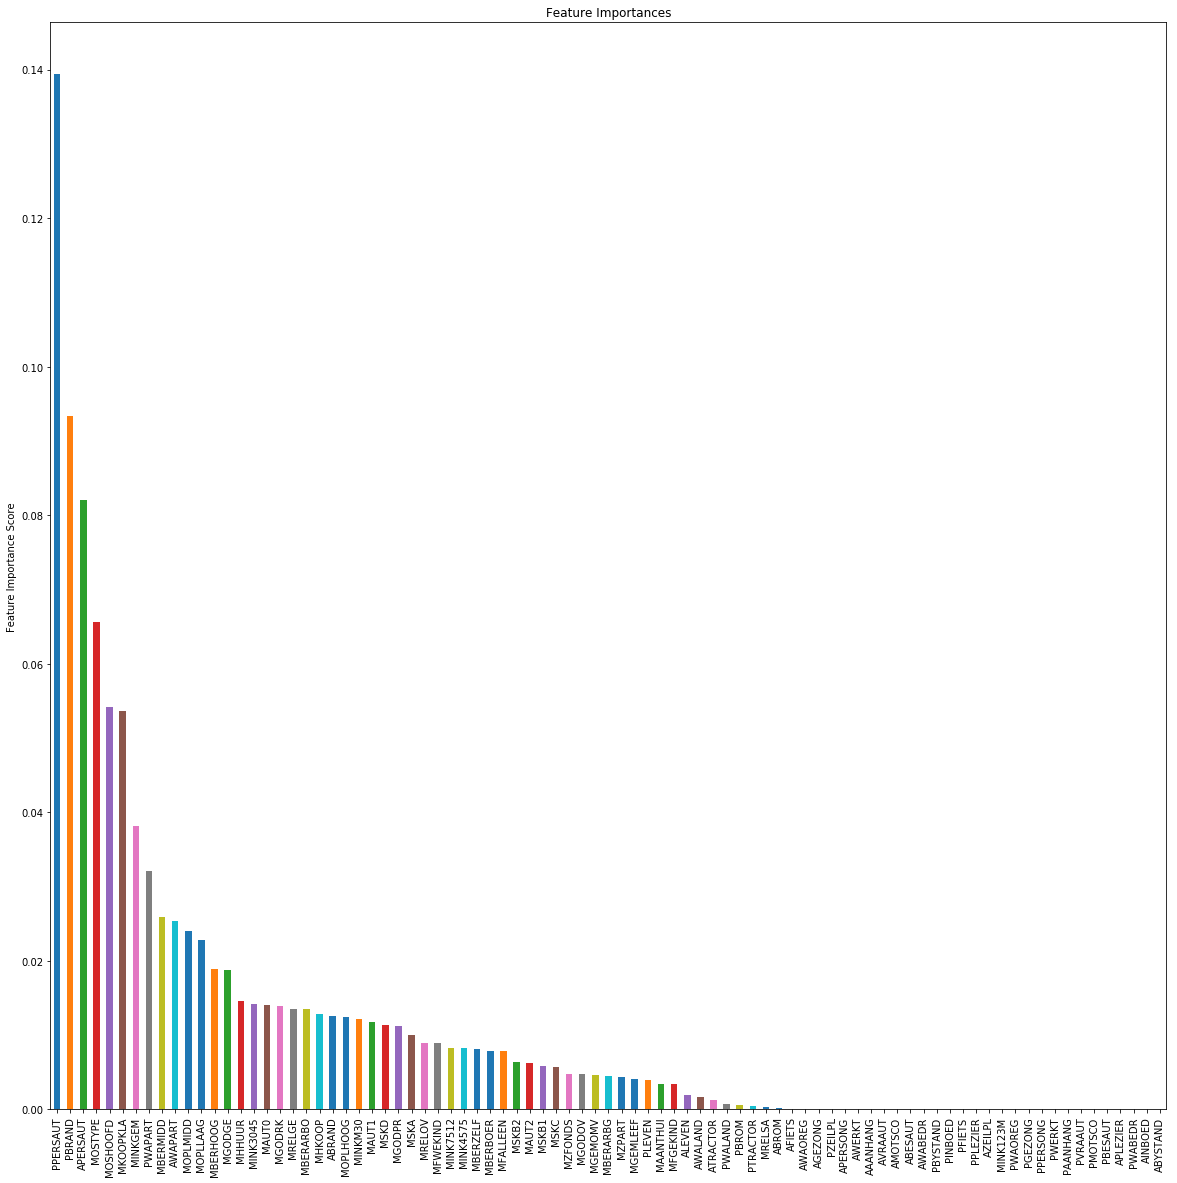

In [74]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.025, n_estimators=140,max_depth=5,
                                         min_samples_split=800,min_samples_leaf=60, 
                                         subsample=0.85, random_state=10, max_features=9)
modelfit(gbm_tuned_1, train, predictors)


Model Report
Accuracy : 0.9374
AUC Score (Train): 0.841179
CV Score : Mean - 0.7612796 | Std - 0.04203202 | Min - 0.7179843 | Max - 0.8191076


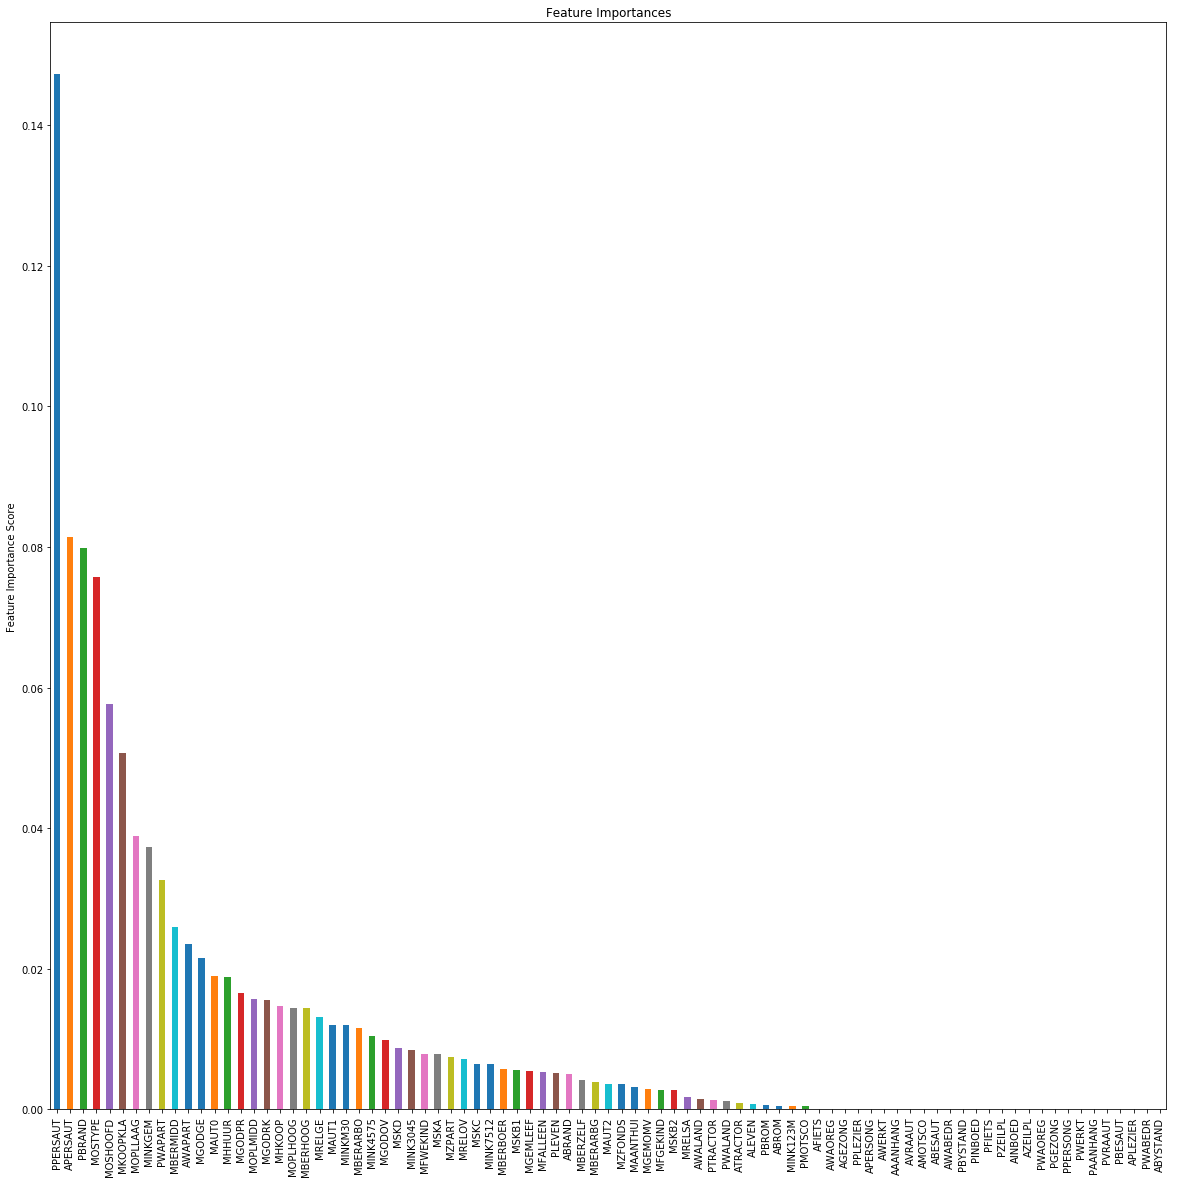

In [75]:
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=900,max_depth=5, 
                                         min_samples_split=800,min_samples_leaf=60, 
                                         subsample=0.85, random_state=10, max_features=9)
modelfit(gbm_tuned_2, train, predictors)

In [76]:
prediction_proba_2 = gbm_tuned_2.predict_proba(test_)

In [77]:
submit = make_submission(prediction_proba_2[:,1])

In [78]:
submit.to_csv(PATH + 'gbm_tuned_2.csv')

## Ensemble

In [97]:
def ensemble():
    stacked_1 = pd.read_csv('ensemble_.csv')#.842
    stacked_2 = pd.read_csv('315_37929_us_ensemble.csv')#.842
    stacked_3 = pd.read_csv('315_67174_us_asd.csv')#.838
    stacked_4 = pd.read_csv('315_67174_us_cat_1.csv')#.835
    stacked_5 = pd.read_csv('ensemble_.csv')#835
    stacked_6 = pd.read_csv('ensemble_.csv')#.841
    
    sub = pd.DataFrame()
    sub['ID'] = stacked_1['ID']
    sub['Purchase'] = (np.mean(
        [
            stacked_1['Purchase'].apply(lambda x: np.abs(x)), \
            stacked_2['Purchase'].apply(lambda x: np.abs(x)), \
            stacked_3['Purchase'].apply(lambda x: np.abs(x)), \
            stacked_4['Purchase'].apply(lambda x: np.abs(x)), \
            stacked_5['Purchase'].apply(lambda x: np.abs(x)), \
            stacked_6['Purchase'].apply(lambda x: np.abs(x)), \
            ], axis=0))
    sub.to_csv('ensemble_3_last.csv', index=False, float_format='%.6f')

In [98]:
ensemble()